In [272]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [273]:
#importing the data
df = pd.read_csv("dssalaries.csv")

# Data manipulation and cleaning

In [274]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Analyst,142000,USD,142000,US,0,US,M
1,2025,MI,FT,Analyst,87000,USD,87000,US,0,US,M
2,2025,SE,FT,Data Quality Lead,218700,USD,218700,US,0,US,M
3,2025,SE,FT,Data Quality Lead,163200,USD,163200,US,0,US,M
4,2025,MI,FT,Data Quality Specialist,121524,USD,121524,US,0,US,M


In [275]:
df.shape

(146348, 11)

In [276]:
df= df.drop(["salary", "salary_currency"], axis= 1)

In [277]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Analyst,142000,US,0,US,M
1,2025,MI,FT,Analyst,87000,US,0,US,M
2,2025,SE,FT,Data Quality Lead,218700,US,0,US,M
3,2025,SE,FT,Data Quality Lead,163200,US,0,US,M
4,2025,MI,FT,Data Quality Specialist,121524,US,0,US,M


In [278]:
df.nunique()

work_year                 6
experience_level          4
employment_type           4
job_title               418
salary_in_usd         13245
employee_residence      104
remote_ratio              3
company_location         97
company_size              3
dtype: int64

In [279]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,146348.000000,146348.000000,146348.000000
mean,2024.415646,157485.290691,20.901550
std,0.674981,74134.134223,40.591728
min,2020.000000,15000.000000,0.000000
25%,2024.000000,106000.000000,0.000000
50%,2025.000000,146100.000000,0.000000
75%,2025.000000,198000.000000,0.000000
max,2025.000000,800000.000000,100.000000


In [280]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [281]:
df.duplicated().sum()

76511

In [282]:
df= df.drop_duplicates()

In [283]:
df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

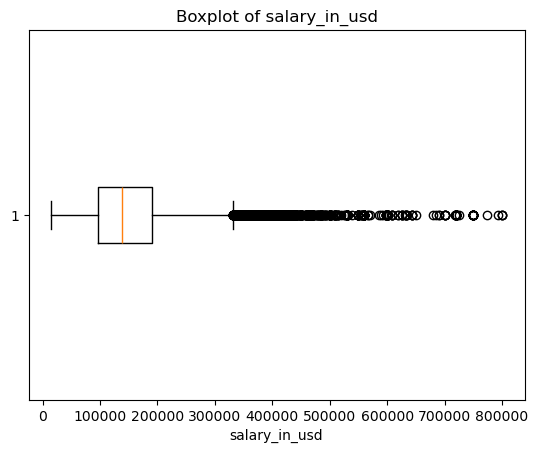

In [284]:
#checking for outliers in "salary_in_usd"
plt.boxplot(df['salary_in_usd'], vert= False)
plt.title("Boxplot of salary_in_usd")
plt.xlabel('salary_in_usd')
plt.show

In [285]:
df[(df['employee_residence'].isin(['UK', 'US', 'CA']) & (df['salary_in_usd'] < 25000))]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3631,2025,EN,PT,Research Assistant,24000,US,0,US,M
8385,2025,MI,FT,Business Development Representative,18000,US,0,US,M
9804,2025,MI,FT,Data Scientist,23000,US,0,US,M
9828,2025,EN,FT,BI Analyst,23000,US,0,US,M
16536,2025,SE,FT,Systems Engineer,21950,US,0,US,M
18726,2025,EX,FT,Engineer,20538,US,0,US,M
21807,2025,SE,FT,Data Analyst,21934,US,0,US,M
30939,2025,EN,FT,Data Analyst,23400,US,0,US,M
34505,2025,EN,FT,Data Analyst,21934,US,0,US,M
35896,2025,EN,PT,Engineer,24000,US,0,US,M


In [286]:
# Defining the filter conditions again
valid_residences = ['US', 'UK', 'CA']
valid_employment = ['FT', 'PT', 'CT']
valid_experience = ['MI', 'SE', 'EN']
valid_titles = ['Business Development Representstive', 'Architect', 'Data Engineer', 'Machine Learning Engineer', 'Data Analyst', 'Research Assistant 	', 'Data Scientist', 'BI Analyst 	' ]

# Drop outliers: salary <= 30000 and matching criteria
df = df[~(
    (df['employee_residence'].isin(valid_residences)) &
    (df['employment_type'].isin(valid_employment)) &
    (df['experience_level'].isin(valid_experience)) &
    (df['salary_in_usd'] <= 30000) &
    (df['job_title'].str.lower().str.strip().apply(lambda x: any(t in x for t in valid_titles)))
)]

In [287]:
df[(df['employee_residence'].isin(['UK', 'US', 'CA']) & (df['salary_in_usd'] < 25000))]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3631,2025,EN,PT,Research Assistant,24000,US,0,US,M
8385,2025,MI,FT,Business Development Representative,18000,US,0,US,M
9804,2025,MI,FT,Data Scientist,23000,US,0,US,M
9828,2025,EN,FT,BI Analyst,23000,US,0,US,M
16536,2025,SE,FT,Systems Engineer,21950,US,0,US,M
18726,2025,EX,FT,Engineer,20538,US,0,US,M
21807,2025,SE,FT,Data Analyst,21934,US,0,US,M
30939,2025,EN,FT,Data Analyst,23400,US,0,US,M
34505,2025,EN,FT,Data Analyst,21934,US,0,US,M
35896,2025,EN,PT,Engineer,24000,US,0,US,M


In [288]:
listed_countries = ['US', 'UK', 'CA']
salary_threshold = 30000

# Ensure salary is numeric and float
df['salary_in_usd'] = (
    df['salary_in_usd'].astype(str)
      .str.replace(',', '', regex=False)
      .str.extract(r'([0-9]+(?:\.[0-9]+)?)', expand=False)
)
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce').astype(float)

# Normalize country names
country_norm = (
    df['employee_residence']
      .astype('string')
      .str.strip()
      .str.replace(r'\s+', ' ', regex=True)
      .str.upper()
)
country_map_upper = {
    'UNITED STATES': 'US', 'USA': 'US', 'U.S.': 'US', 'US': 'US',
    'UNITED KINGDOM': 'UK', 'U.K.': 'UK', 'UK': 'UK',
    'CANADA': 'CA', 'CA': 'CA'
}
country_norm = country_norm.map(country_map_upper).fillna(country_norm)
df['country_code'] = country_norm  # temp column

# Global mean (used as fallback)
global_mean = df.loc[df['salary_in_usd'] >= salary_threshold, 'salary_in_usd'].mean()

# Replace salaries < threshold with country mean or fallback
for country in listed_countries:
    mask = (df['country_code'] == country) & (df['salary_in_usd'] < salary_threshold)
    country_salaries = df.loc[(df['country_code'] == country) & (df['salary_in_usd'] >= salary_threshold), 'salary_in_usd']
    mean_salary = country_salaries.mean()

    # Use global mean if country has no valid salaries
    if pd.isna(mean_salary):
        mean_salary = global_mean
        print(f"No valid salary >= {salary_threshold} in {country}, using global mean: {mean_salary:,.2f}")
    else:
        print(f"{mask.sum()} rows in {country} updated with mean salary: {mean_salary:,.2f}")

    # Apply the mean safely
    df.loc[mask, 'salary_in_usd'] = mean_salary

# Clean up
df.drop(columns='country_code', inplace=True)


77 rows in US updated with mean salary: 160,531.54
No valid salary >= 30000 in UK, using global mean: 152,104.17
4 rows in CA updated with mean salary: 130,294.85


# Exploratory Data Analysis

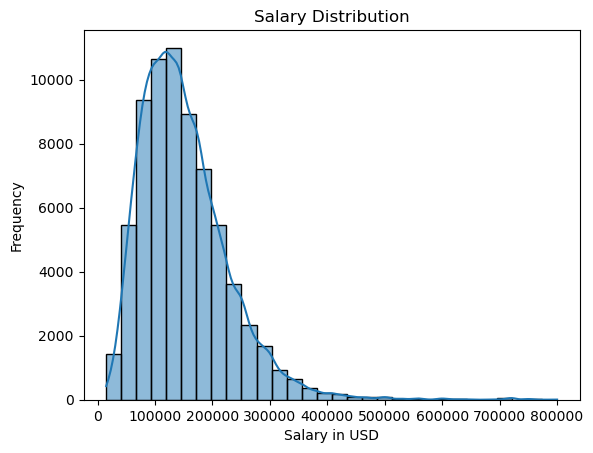

In [289]:
#Histogram of salary distribution
plt.figure(figure =(8,5))
sns.histplot(df['salary_in_usd'], bins=30, kde= True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

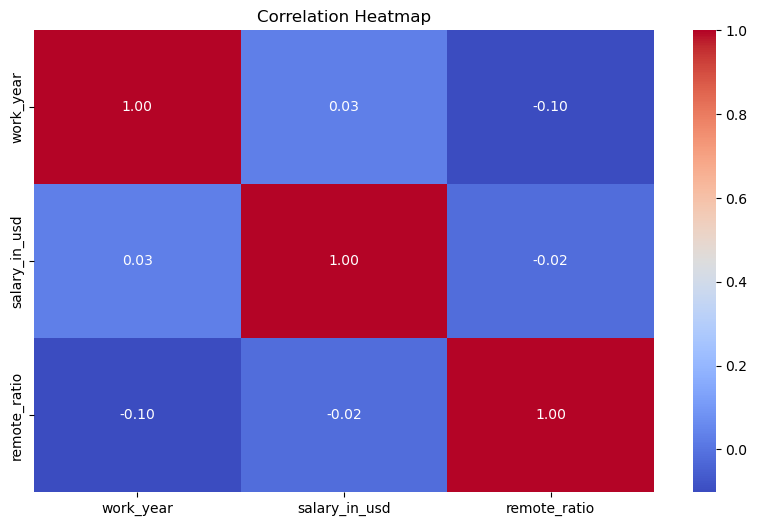

In [291]:
#Corrolation heatmap
plt.figure(figsize=(10,6))
corr =df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

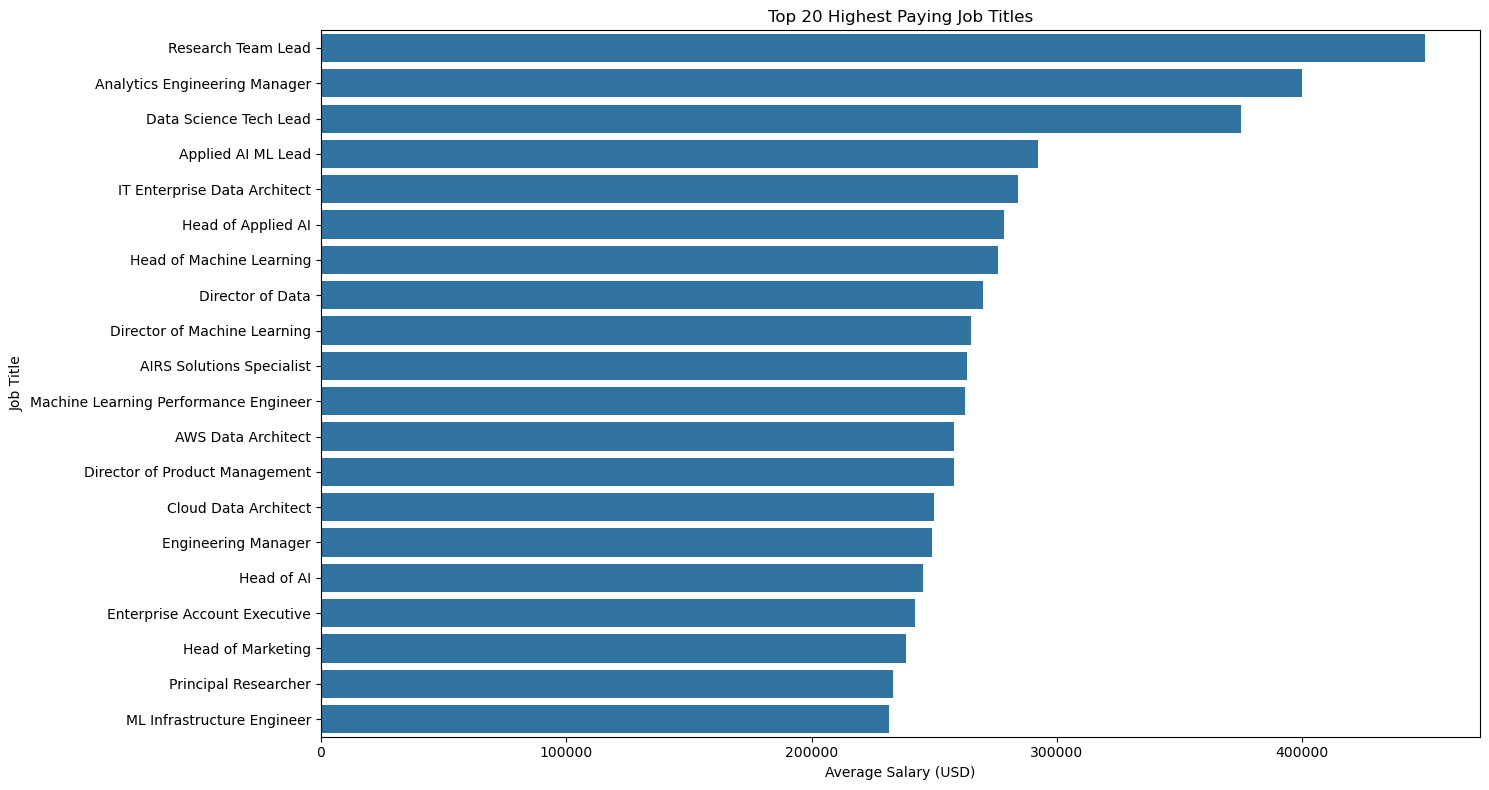

In [305]:
# Top 20 highest paying job titles (based on average salary)
plt.figure(figsize=(15,8))
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title('Top 20 Highest Paying Job Titles')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

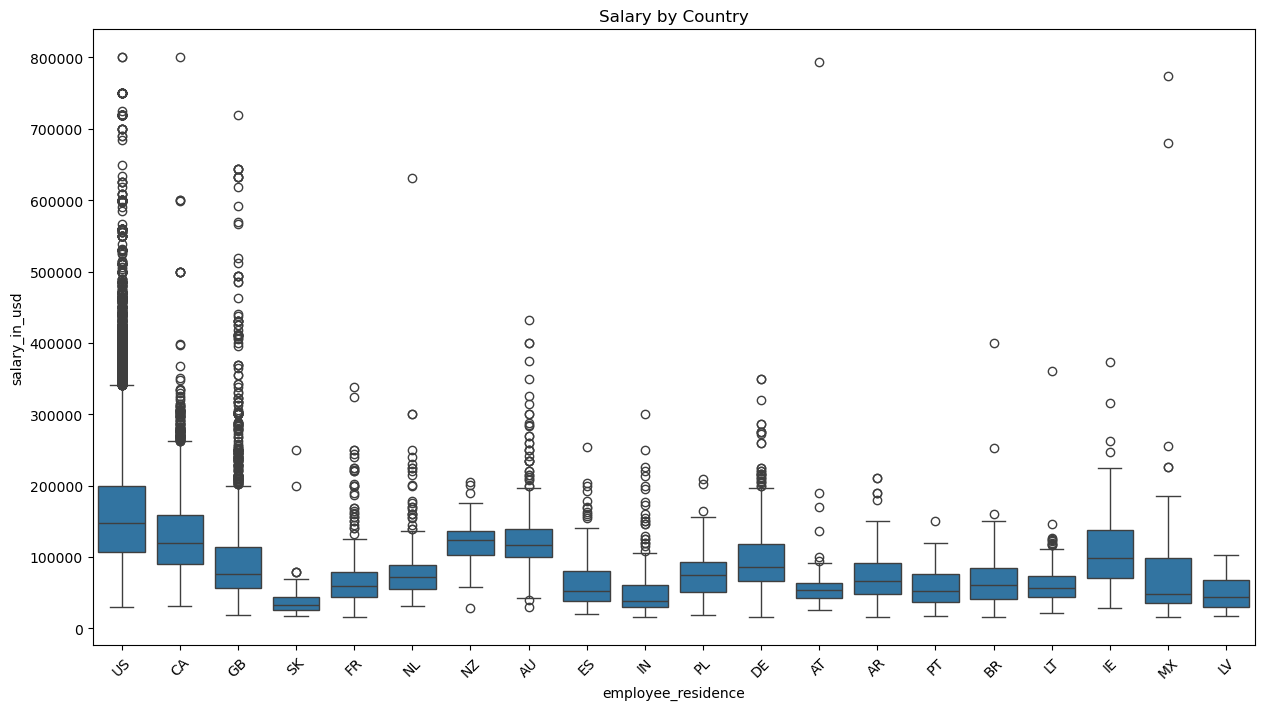

In [294]:
#Boxplot of salary by country
plt.figure(figsize = (15,8))
top_countries = df['employee_residence'].value_counts().head(20).index
sns.boxplot(x='employee_residence', y= 'salary_in_usd', data=df[df['employee_residence'].isin(top_countries)])
plt.title('Salary by Country')
plt.xticks(rotation=45)
plt.show()

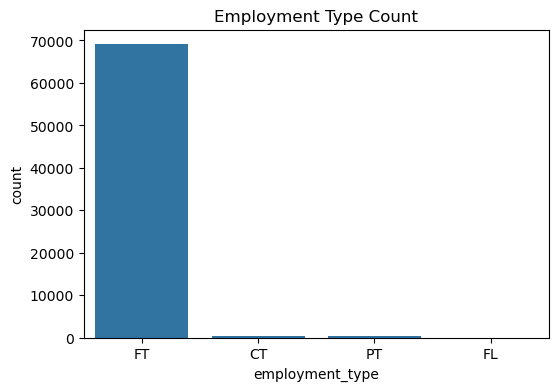

In [297]:
plt.figure(figsize=(6,4))
sns.countplot(x='employment_type', data=df)
plt.title('Employment Type Count')
plt.show()

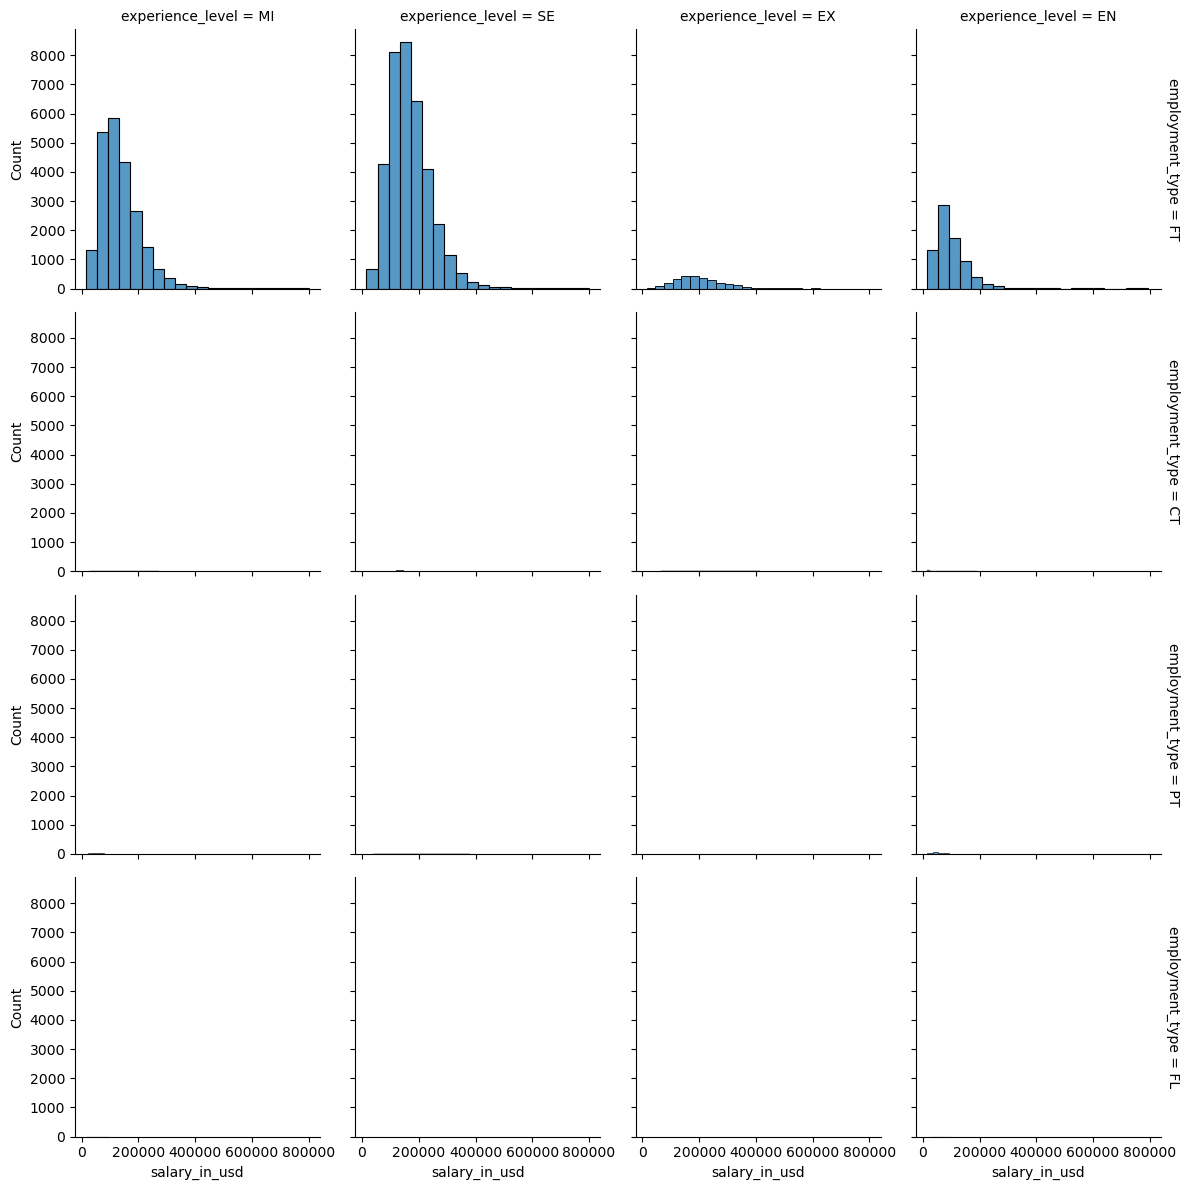

In [299]:
#Facegrid of experience_level and employment_type to salary_in_usd 
g = sns.FacetGrid(df, col='experience_level', row='employment_type', margin_titles=True)
g.map(sns.histplot, 'salary_in_usd', bins=20)
plt.show()